<a href="https://colab.research.google.com/github/Pranali-Patil-1212/linear_regression/blob/main/Car_Price_Prediction_Bivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Problem Statement
A automobile company X-Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. The company wants to know:

* Which variables are significant in predicting the price of a car.

* How well those variables describe the price of a car.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All CSV_Files/CarPrice_Assignment (1).csv')

In [ ]:
car_data.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [ ]:
car_data.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
car_data.shape

(205, 26)

In [ ]:
# get the summary of dataframe
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**EXplora the Dataset**

In [ ]:
car_data.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [ ]:
#Drop the car_Id column as it is not significant
#car_data = car_data.drop('car_ID', axis=1)
car_data.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [ ]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
st = 'alfa-romero Quadrifoglio'
#print(st.split()) #gives all the splitting words from the given string
print(st.split()[0]) #gives only first word at index 0 from the string

alfa-romero


In [ ]:
#splitting CarName to extract Brands of Car
brand = car_data.CarName.apply(lambda x: x.split()[0]) #extract the carbrand name from carname
car_data.insert(3, 'Brand', brand)#insert the column at 3 index place
car_data.drop('CarName', axis=1, inplace=True) #Drop carname from the dataframe
car_data.head()

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Spliting CarName to extract Brands of Car
brand = car_data.Brand.apply(lambda s: s.split()[0])
car_data.insert(3,"CarBrandName", brand)
car_data.drop(['Brand'],axis=1,inplace=True)
car_data.head()

,car_ID,symboling,CarBrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_data.CarBrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
name_correction = {'toyouta': 'toyota',
                  'Nissan': 'nissan',
                  'maxda': 'mazda',
                  'vokswagen': 'volkswagen',
                  'vw':'volkswagen',
                  'porcshce': 'porsche'}
car_data.CarBrandName = car_data.CarBrandName.apply(lambda s: name_correction[s] if s in name_correction else s)

In [ ]:
car_data.CarBrandName.nunique()

22

In [ ]:
car_data.CarBrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Checking for duplicates and missing values**

In [ ]:
car_data.loc[car_data.duplicated()]

,car_ID,symboling,CarBrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**There is no duplicate row in dataset**

In [ ]:
car_data.isnull().sum()

,0
car_ID,0
symboling,0
CarBrandName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


There is no missing values in dataset

In [ ]:
#Getting the number of columns/variables in dataset
car_data.columns

Index(['car_ID', 'symboling', 'CarBrandName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Visual Analysis of data


/tmp/ipython-input-2315705976.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=car_data.price)


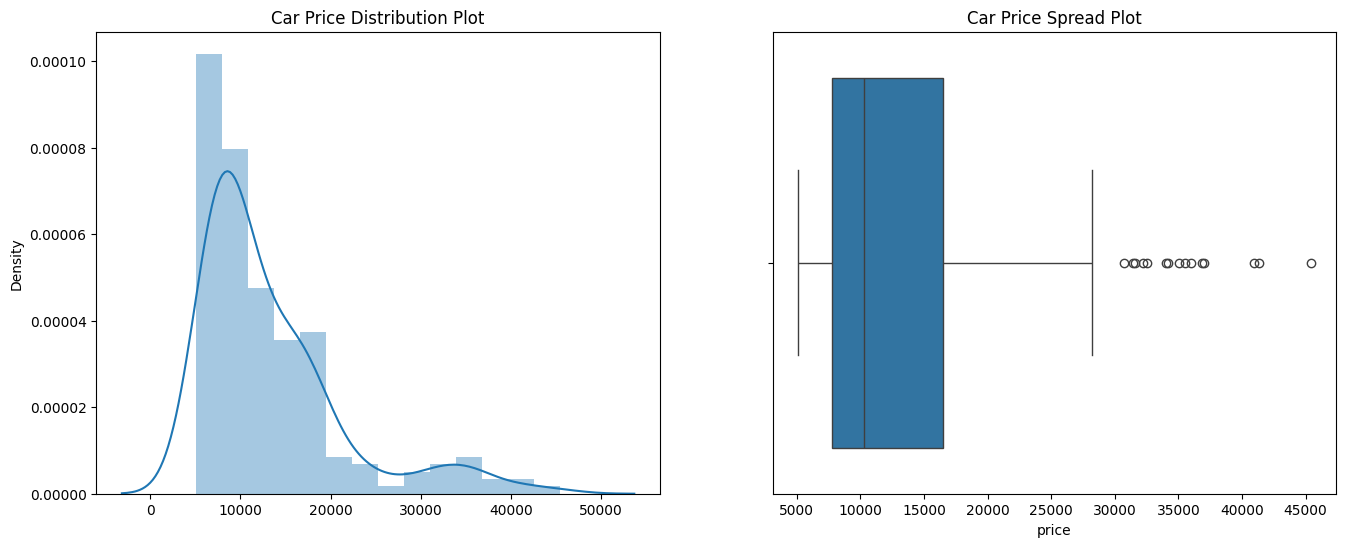

In [ ]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(x=car_data.price)

plt.subplot(1, 2, 2)
plt.title('Car Price Spread Plot')
sns.boxplot(x= car_data.price)

plt.show()

In [ ]:
#Getting Numeric Analysis
car_data.price.describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


Visualising Categorical Data

In [ ]:
car_data.select_dtypes('object').columns

Index(['CarBrandName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

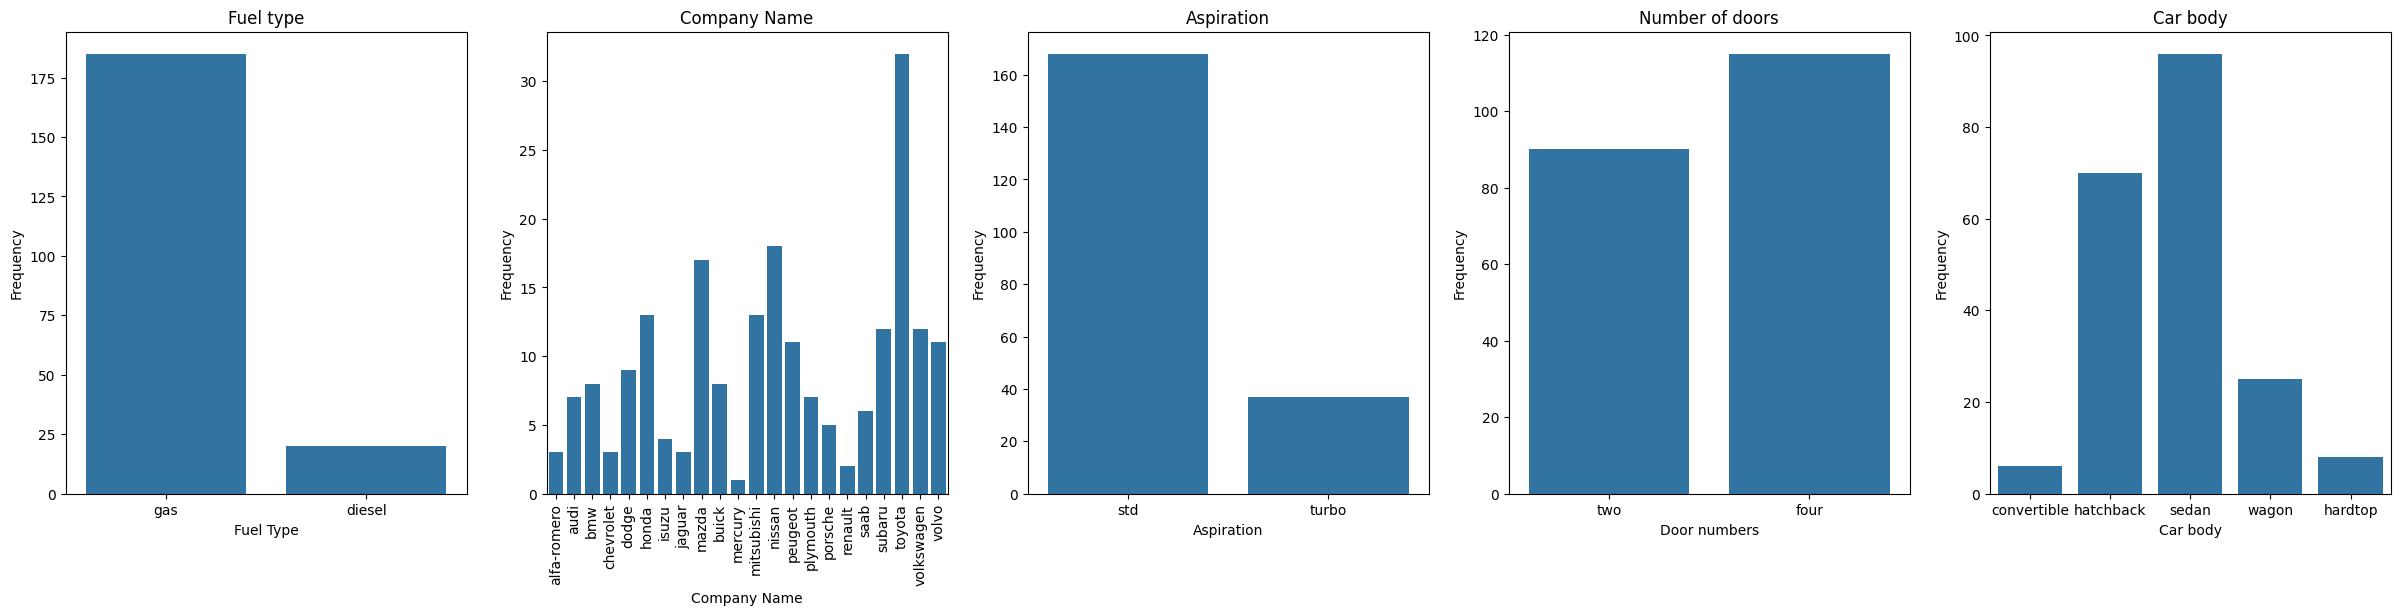

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
plt.title('Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
sns.countplot(x=car_data.fueltype)

plt.subplot(1,5,2)
plt.title('Company Name')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
sns.countplot(x=car_data.CarBrandName)

plt.subplot(1,5,3)
plt.title('Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Frequency')
sns.countplot(x=car_data.aspiration)

plt.subplot(1,5,4)
plt.title('Number of doors')
plt.xlabel('Door numbers')
plt.ylabel('Frequency')
sns.countplot(x=car_data.doornumber)

plt.subplot(1,5,5)
plt.title('Car body')
plt.xlabel('Car body')
plt.ylabel('Frequency')
sns.countplot(x=car_data.carbody)

plt.show()

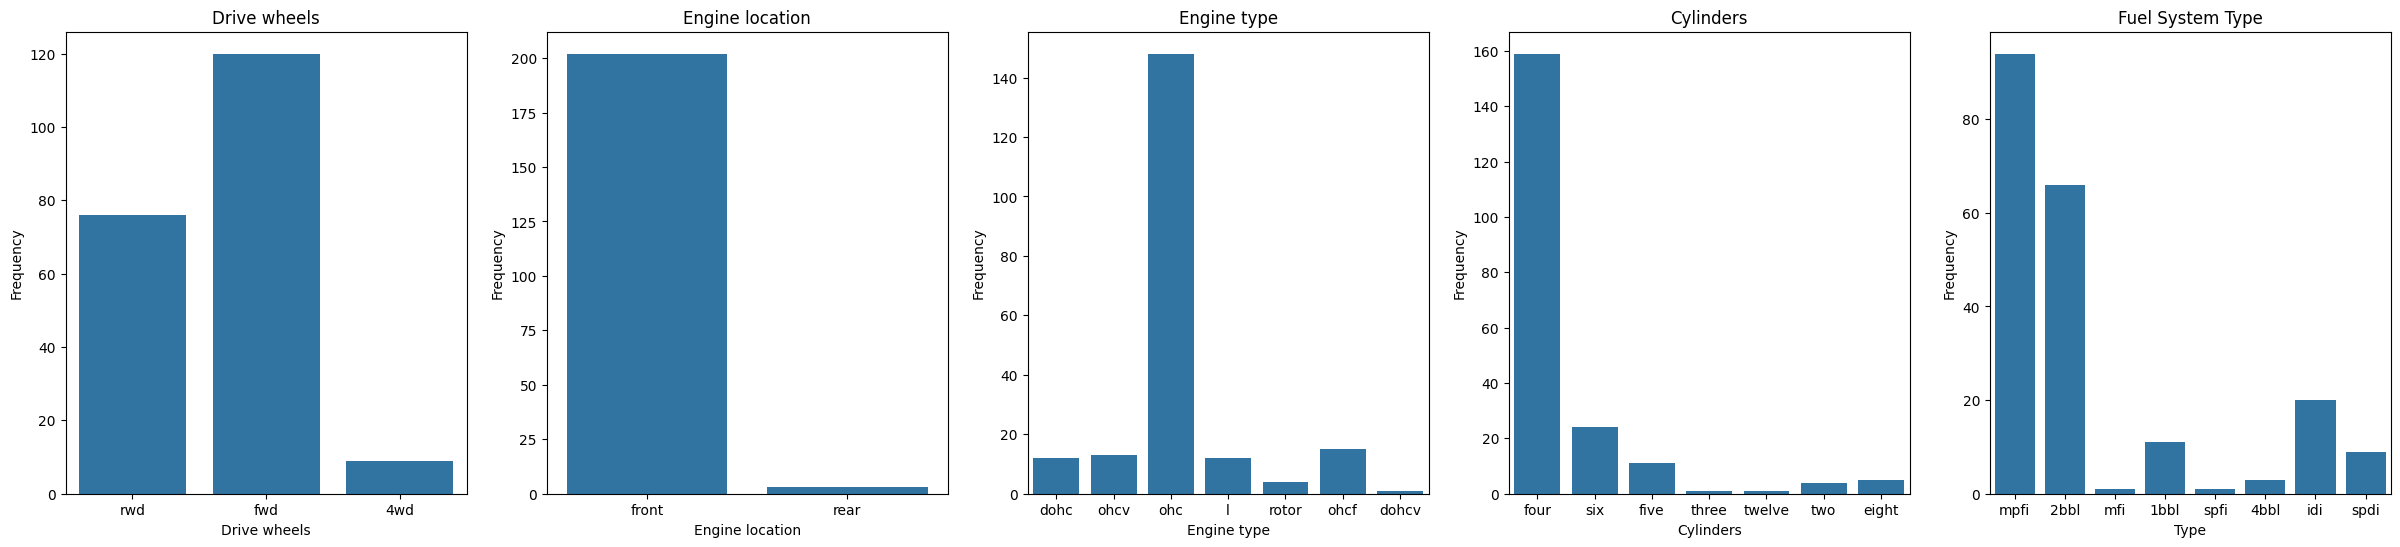

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
plt.title('Drive wheels')
plt.xlabel('Drive wheels')
plt.ylabel('Frequency')
sns.countplot(x=car_data.drivewheel)

plt.subplot(1,5,2)
plt.title('Engine location')
plt.xlabel('Engine location')
plt.ylabel('Frequency')
sns.countplot(x=car_data.enginelocation)

plt.subplot(1,5,3)
plt.title('Engine type')
plt.xlabel('Engine type')
plt.ylabel('Frequency')
sns.countplot(x=car_data.enginetype)

plt.subplot(1,5,4)
plt.title('Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
sns.countplot(x=car_data.cylindernumber)

plt.subplot(1,5,5)
plt.title('Fuel System Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
sns.countplot(x=car_data.fuelsystem)

plt.show()

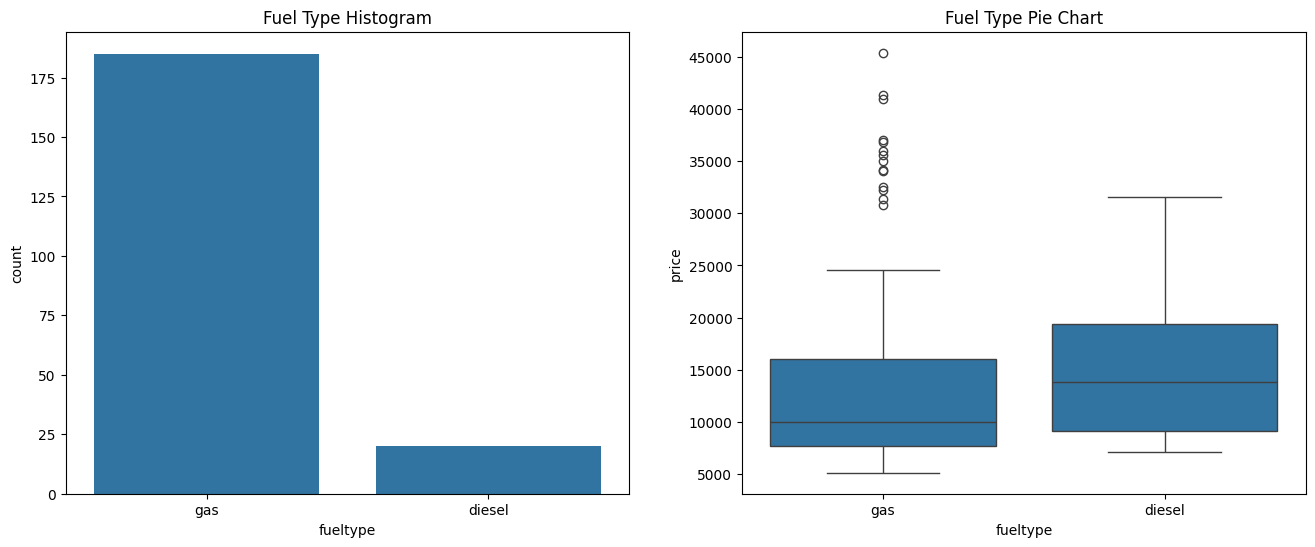

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(x=car_data.fueltype)

plt.subplot(1,2,2)
plt.title('Fuel Type Pie Chart')
sns.boxplot(x=car_data.fueltype, y=car_data.price)

plt.show()

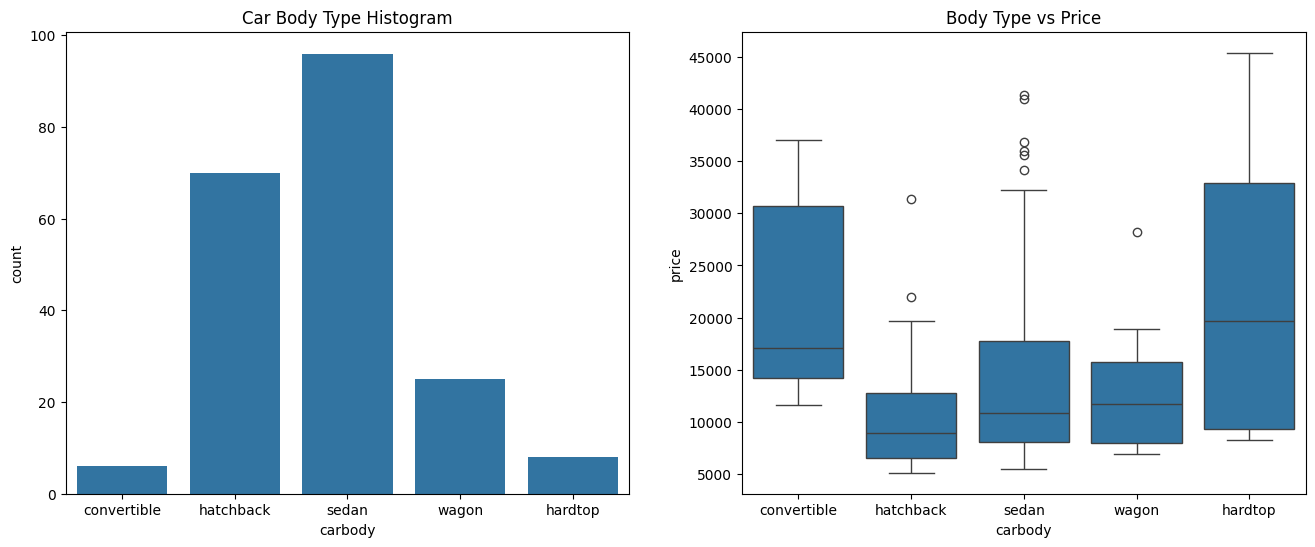

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Car Body Type Histogram')
sns.countplot(x=car_data.carbody)

plt.subplot(1,2,2)
plt.title('Body Type vs Price')
sns.boxplot(x=car_data.carbody, y=car_data.price)

plt.show()

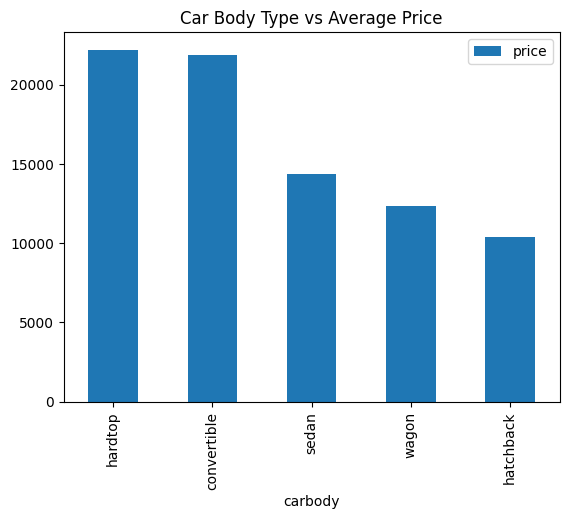

In [ ]:
df= pd.DataFrame(car_data.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Body Type vs Average Price')
plt.show()

Diesel has higher average price than gas

Hardtop and convertible have higher average price

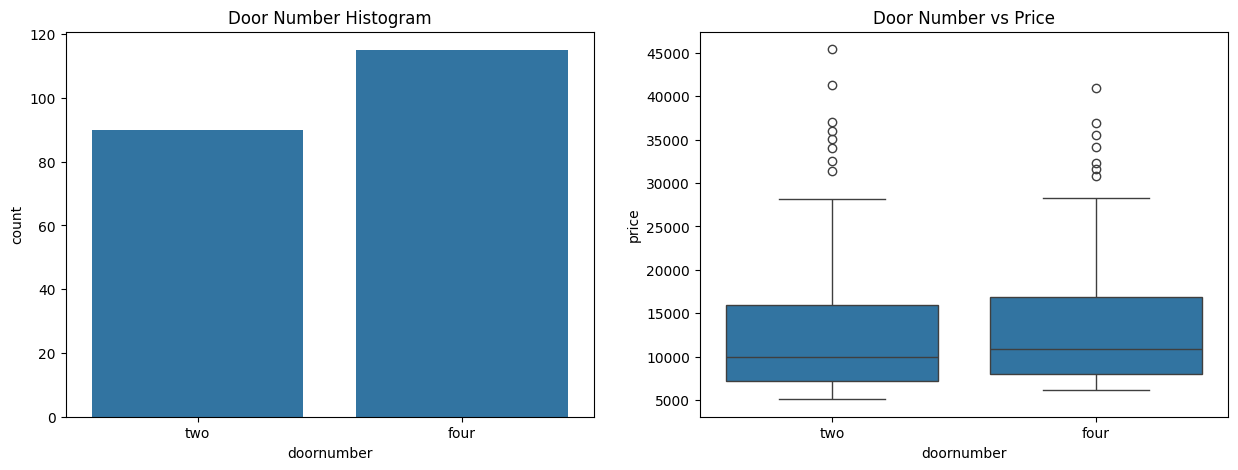

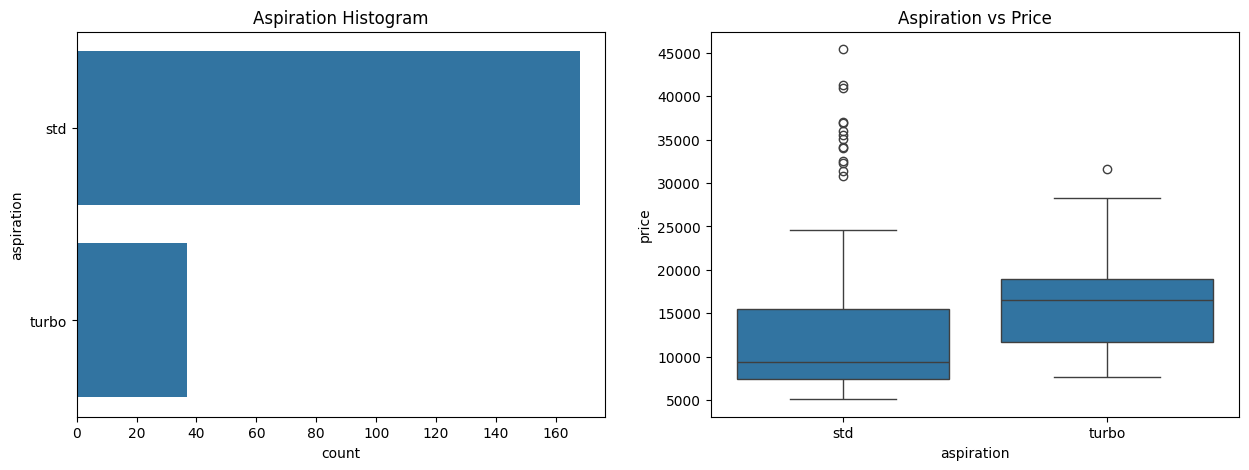

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=car_data.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_data.doornumber, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_data.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_data.aspiration, y=car_data.price)

plt.show()

Visualizing Numerical Data

In [ ]:
car_data.select_dtypes(include=['int64', 'float64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

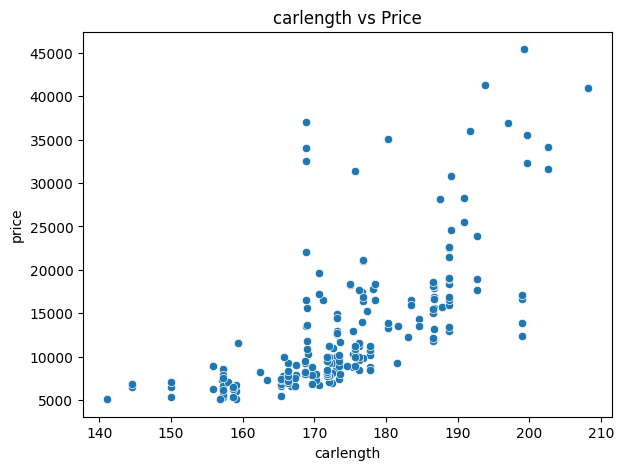

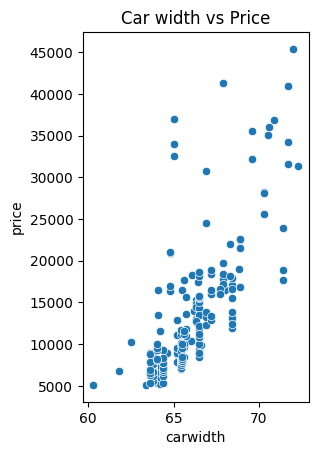

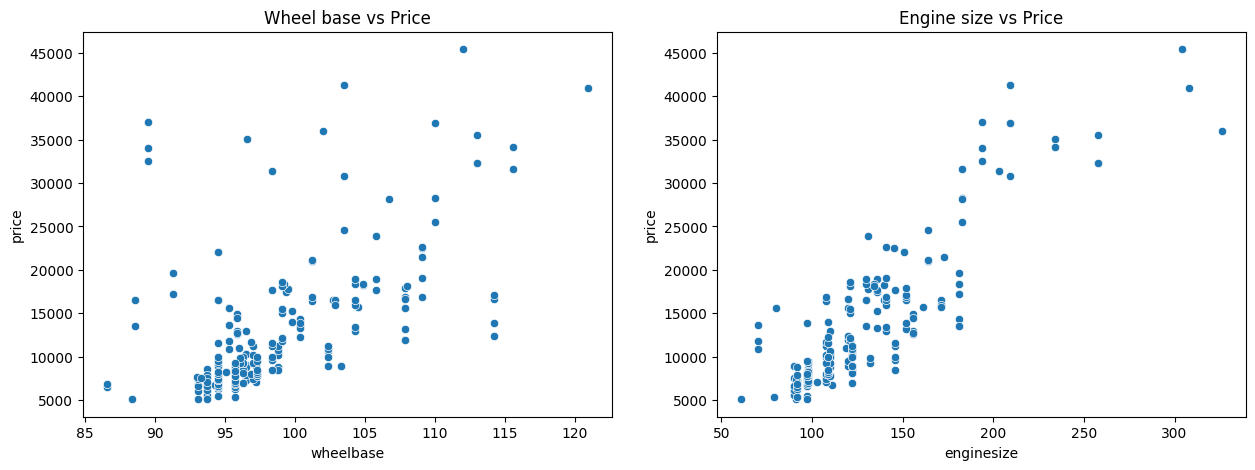

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('carlength vs Price')
sns.scatterplot(x=car_data.carlength, y=car_data.price)

plt.show()

plt.subplot(1,2,2)
plt.title('Car width vs Price')
sns.scatterplot(x=car_data.carwidth, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Wheel base vs Price')
sns.scatterplot(x=car_data.wheelbase, y=car_data.price)

plt.subplot(1,2,2)
plt.title('Engine size vs Price')
sns.scatterplot(x=car_data.enginesize, y=car_data.price)

plt.show()

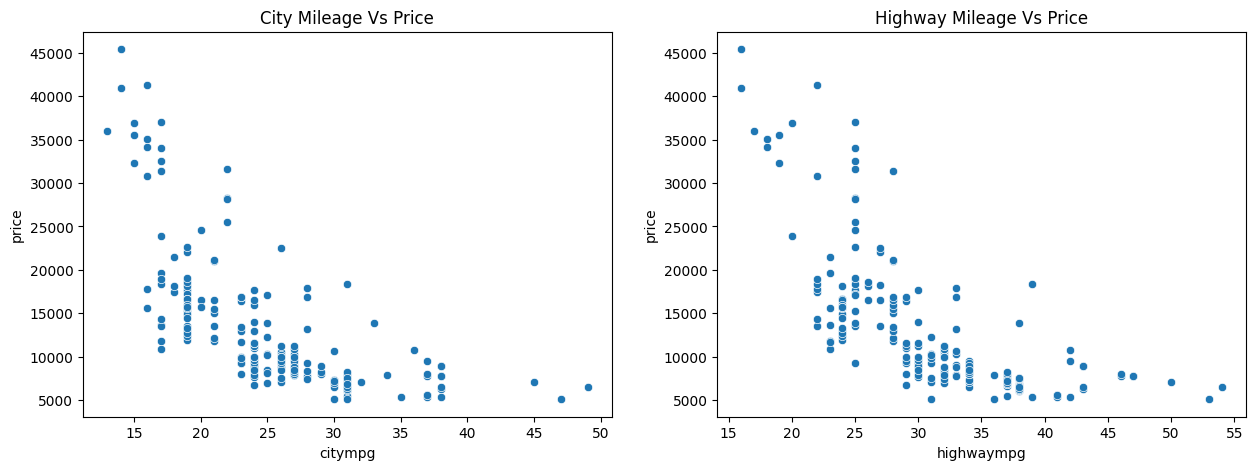

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('City Mileage Vs Price')
sns.scatterplot(x=car_data.citympg, y=car_data.price)

plt.subplot(1,2,2)
plt.title('Highway Mileage Vs Price')
sns.scatterplot(x=car_data.highwaympg, y=car_data.price)

plt.show()

Feature Engineering

In [ ]:
# creating a new feature using citympg and highwaympg
car_data['mpg']=(0.60 * car_data.citympg) + (0.40 * car_data.highwaympg)
#drop the original variables
car_data.drop(['citympg', 'highwaympg'], axis=1, inplace=True)
car_data.head()

,car_ID,symboling,CarBrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6


Feature Selection

In [ ]:
# correlation using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(car_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'alfa-romero'

<Figure size 2500x2000 with 0 Axes>

Based on correlation analysis the important variables are:

wheelbase

carlength

carwidth

curbwieght

enginesize

boreratio

horsepower

mpg

Engine Type

Fuel type

Car Body

Aspiration

Cylinder Number

Drivewheel

In [ ]:
car_data_new = car_data[[ 'wheelbase','carlength','carwidth','curbweight','fueltype','enginesize',
                         'boreratio','horsepower','mpg','enginetype','fueltype','carbody',
                         'aspiration','cylindernumber','drivewheel','price']]
car_data_new.head()

,wheelbase,carlength,carwidth,curbweight,fueltype,enginesize,boreratio,horsepower,mpg,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,price
0,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd,13495.0
1,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd,16500.0
2,94.5,171.2,65.5,2823,gas,152,2.68,154,21.8,ohcv,gas,hatchback,std,six,rwd,16500.0
3,99.8,176.6,66.2,2337,gas,109,3.19,102,26.4,ohc,gas,sedan,std,four,fwd,13950.0
4,99.4,176.6,66.4,2824,gas,136,3.19,115,19.6,ohc,gas,sedan,std,five,4wd,17450.0


Let's put Altogether

In [ ]:
sns.pairplot(car_data_new)
plt.show()

ValueError: 2

Getting input and output for problem

Categorical --
1. Nominal --- (No sense of Measurement) - Gender/Fueltype --- OnehotEnding

2. Ordinal --- (Sense of Measurement) -- ShirtSize/Cylindernumber--LabelEncoder

In [ ]:
X = car_data_new.drop('price', axis=1)
y = car_data_new['price']
x.head()

,wheelbase,carlength,carwidth,curbweight,fueltype,enginesize,boreratio,horsepower,mpg,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel
0,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd
1,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd
2,94.5,171.2,65.5,2823,gas,152,2.68,154,21.8,ohcv,gas,hatchback,std,six,rwd
3,99.8,176.6,66.2,2337,gas,109,3.19,102,26.4,ohc,gas,sedan,std,four,fwd
4,99.4,176.6,66.4,2824,gas,136,3.19,115,19.6,ohc,gas,sedan,std,five,4wd


Encode categorical columns

In [ ]:
X = pd.get_dummies(X, columns= ['enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel'], drop_first= True)
X.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mpg,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,23.4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True
1,88.6,168.8,64.1,2548,130,3.47,111,23.4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True
2,94.5,171.2,65.5,2823,152,2.68,154,21.8,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True
3,99.8,176.6,66.2,2337,109,3.19,102,26.4,False,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False
4,99.4,176.6,66.4,2824,136,3.19,115,19.6,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False


In [ ]:
X.shape

(205, 29)

Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(153, 29) (52, 29)


Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Getting Accuracies

In [ ]:
+-from sklearn.metrics import r2_score
print("Train Accuracy:", r2_score(lr.predict(X_train), y_train))
print("Test Accuracy:", r2_score(lr.predict(X_test), y_test))

Train Accuracy: 0.9141267417911458
Test Accuracy: 0.8321321764542096
